# Neste primeiro exercício vamos utilizar os dados de Galton que foram a origem da teoria de regressão linear

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn

importando dados do Galton

In [2]:
filepath = os.path.join('..', 'data', 'Galton.csv')
filepath

'../data/Galton.csv'

In [3]:
Galton = pd.read_csv(filepath)

In [4]:
Galton.head(10)

,Family,Father,Mother,Gender,Height,Kids
0,1,1.9939,1.7018,M,1.85928,4
1,1,1.9939,1.7018,F,1.75768,4
2,1,1.9939,1.7018,F,1.75260,4
3,1,1.9939,1.7018,F,1.75260,4
4,2,1.9177,1.6891,M,1.86690,4
5,2,1.9177,1.6891,M,1.84150,4
6,2,1.9177,1.6891,F,1.66370,4
7,2,1.9177,1.6891,F,1.66370,4
8,3,1.9050,1.6256,M,1.80340,2
9,3,1.9050,1.6256,F,1.72720,2


Criando Vetores com Variável Dependentes (Resposta) e Independente (Co-variável)

In [5]:
X=Galton['Father']
Y=Galton['Height']
print(X)


0      1.9939
1      1.9939
2      1.9939
3      1.9939
4      1.9177
5      1.9177
6      1.9177
7      1.9177
8      1.9050
9      1.9050
10     1.9050
11     1.9050
12     1.9050
13     1.9050
14     1.9050
15     1.9050
16     1.9050
17     1.9050
18     1.9050
19     1.9050
20     1.9050
21     1.8796
22     1.8796
23     1.8796
24     1.8796
25     1.8796
26     1.8796
27     1.8796
28     1.8796
29     1.8796
        ...  
860    1.6637
861    1.6637
862    1.6637
863    1.6637
864    1.6637
865    1.6637
866    1.6637
867    1.6637
868    1.6256
869    1.6256
870    1.6256
871    1.6256
872    1.6256
873    1.6256
874    1.6256
875    1.6256
876    1.6256
877    1.6256
878    1.6256
879    1.6256
880    1.6256
881    1.6256
882    1.6256
883    1.6256
884    1.6256
885    1.5748
886    1.5748
887    1.5748
888    1.5875
889    1.5875
Name: Father, Length: 890, dtype: float64


Analisando Histograma

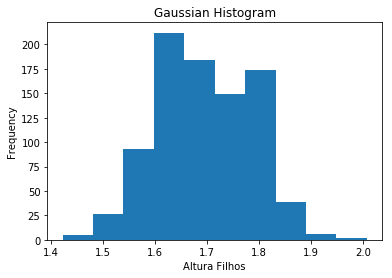

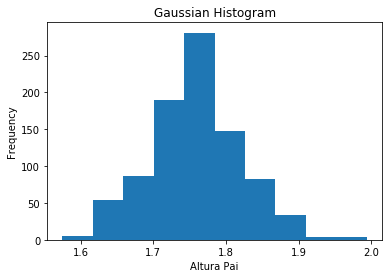

In [6]:
plt.hist(Y)
plt.title("Gaussian Histogram")
plt.xlabel("Altura Filhos")
plt.ylabel("Frequency")
plt.show()

plt.hist(X)
plt.title("Gaussian Histogram")
plt.xlabel("Altura Pai")
plt.ylabel("Frequency")
plt.show()


Vamos criar amostra de teste e treinamento (Cuidado Overfiting)

In [7]:
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
print(X)
X_train = X[:-445]
X_test = X[-445:]
Y_train = Y[:-445]
Y_test = Y[-445:]


[[ 1.9939 ]
 [ 1.9939 ]
 [ 1.9939 ]
 [ 1.9939 ]
 [ 1.9177 ]
 [ 1.9177 ]
 [ 1.9177 ]
 [ 1.9177 ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.905  ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8923 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8796 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.8542 ]
 [ 1.85928]
 [ 1.84658]
 [ 1.84658]
 [ 1.84658]
 [ 1.84658]
 [ 1.84658]
 [ 1.84658]
 [ 1.84658]
 [ 1.84658]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1.8288 ]
 [ 1

Analisando a Correlação entre as variáveis 

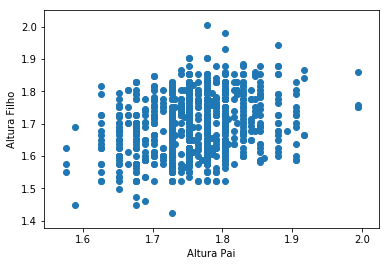

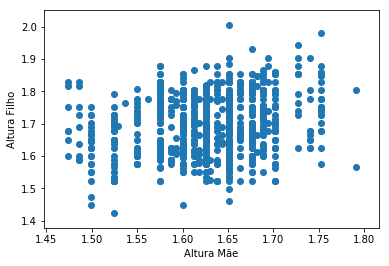

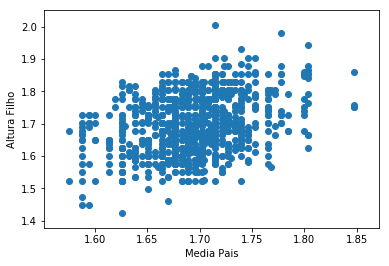

In [8]:
plt.scatter(X,Y)
plt.xlabel("Altura Pai")
plt.ylabel("Altura Filho")
plt.show() 

M = Galton['Mother']
plt.scatter(M,Y)
plt.xlabel("Altura Mãe")
plt.ylabel("Altura Filho")
plt.show() 

Z= (Galton['Father'] + Galton['Mother'])/2

plt.scatter(Z,Y)
plt.xlabel("Media Pais")
plt.ylabel("Altura Filho")
plt.show() 


Z=Z.values.reshape(len(Z),1)
Z_train = Z[:-445]
Z_test = Z[-445:]




In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(Z_train, Y_train)

beta1=regr.coef_

intercepto=regr.intercept_

print(beta1)
print(intercepto)

#R quadrado da amostra de treinamento
regr.score(Z_train,Y_train)



[[ 0.61447521]]
[ 0.65998717]


0.05746936718620077

Analisando amostra de Teste

In [10]:
#R quadrado da amostra de teste
predictions = regr.predict(Z_test)
regr.score(predictions,Y_test)


-0.016501795679934261

Executando a regressao linear com altura do pai e da mae

In [11]:

X2_train = Galton[:-445]
X2_test = Galton[-445:]

X2_train=X2_train.drop(["Family"],axis=1)
X2_train=X2_train.drop(["Height"],axis=1)
X2_train=X2_train.drop(["Gender"],axis=1)
X2_train=X2_train.drop(["Kids"],axis=1)


X2_train.head(450)

,Father,Mother
0,1.9939,1.70180
1,1.9939,1.70180
2,1.9939,1.70180
3,1.9939,1.70180
4,1.9177,1.68910
5,1.9177,1.68910
6,1.9177,1.68910
7,1.9177,1.68910
8,1.9050,1.62560
9,1.9050,1.62560


In [12]:

regr.fit(X2_train, Y_train)

beta1=regr.coef_

intercepto=regr.intercept_

print(beta1)
print(intercepto)

#R quadrado da amostra de treinamento
regr.score(X2_train,Y_train)


[[ 0.25934756  0.32925071]]
[ 0.71045998]


0.058226335383287142